In [1]:
import matplotlib.pyplot as plt
from math import *

In [2]:
a=1##из ур-я
CFL = 0.6##0.6 1 1.01 (число Куранта)
L = 20 ## размер области
h = 0.5 ## шаг по простр.перем.
T = 18 ## расчетное время
t = CFL*h
N_t =int(T/t) ##кол-во узлов по времени-1
t = T/N_t ##шаг по времени
print(t, N_t)

0.3 60


In [3]:
dt_out_results2 = 2 ## период вывода значеиний у по уголку
dt_out_results1 = 2## период вывода значеиний у по лаксу
time_next_output1 = dt_out_results1
time_next_output2 = dt_out_results2

In [4]:
results1, results2 = [[]], [[]]
x, y_0, u_0 = [], [], [] ## u-уголок; y-Лакса-Вендрофа
y, u  = [[]], [[]]

In [5]:
for i in range (int(L/h+1)) :
    x.append((i)*h)
    y_0.append(sin(4*pi*x[i]/L)) ## y(x,0)- граничное условие

y[0] = y_0
u[0] = y_0
results1[0] = y_0
results2[0] = y_0
print(x)
print(y[0])

[0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 9.5, 10.0, 10.5, 11.0, 11.5, 12.0, 12.5, 13.0, 13.5, 14.0, 14.5, 15.0, 15.5, 16.0, 16.5, 17.0, 17.5, 18.0, 18.5, 19.0, 19.5, 20.0]
[0.0, 0.3090169943749474, 0.5877852522924731, 0.8090169943749473, 0.9510565162951535, 1.0, 0.9510565162951536, 0.8090169943749475, 0.5877852522924732, 0.3090169943749475, 1.2246467991473532e-16, -0.3090169943749469, -0.587785252292473, -0.8090169943749473, -0.9510565162951535, -1.0, -0.9510565162951536, -0.8090169943749476, -0.5877852522924732, -0.3090169943749476, -2.4492935982947064e-16, 0.3090169943749472, 0.5877852522924722, 0.8090169943749472, 0.9510565162951534, 1.0, 0.9510565162951536, 0.8090169943749477, 0.5877852522924734, 0.3090169943749478, 3.6739403974420594e-16, -0.30901699437494706, -0.5877852522924728, -0.8090169943749472, -0.9510565162951534, -1.0, -0.9510565162951538, -0.8090169943749477, -0.5877852522924735, -0.3090169943749479, -4.8985871965894

In [7]:
counter_t1 = 0
counter_t2 = 0
k_u=0
k_y =0

In [10]:
##ЛАКСА
for n in range (N_t+1):
    y.append([])
    y[n+1].append(33)
    for i in range(int(L/h)-1):
        y[n+1].append(y[n][i+1] - CFL/2*(y[n][i+2] - y[n][i]) + CFL**2/2*(y[n][i+2] - 2*y[n][i+1] + y[n][i]))
    y[n+1].append(y[n][40] - a*CFL/2*(y[n][0] - y[n][39]) + a**2*CFL**2/2*(y[n][0] - 2*y[n][40] + y[n][39]))
    print(y[n+1][40])
    y[n+1][0] = y[n][0] - a*CFL/2*(y[n][1] - y[n][int(L/h)]) + a**2*CFL**2/2*(y[n][1] - 2*y[n][0] + y[n][int(L/h)])
    print(y[n + 1])
    counter_t1 += t
    if (counter_t1 >= time_next_output1) :
        results1.append(y[n+1])
        ##print((counter_t1), y[n+1])
        k_y+=1
        time_next_output1 += dt_out_results1

-0.8770043277288728
[-0.03708203932499393, 0.12723664612486957, -0.14832815729997528, 33, 0.12723664612486957, -0.14832815729997528, 33, 0.12723664612486957, 0.4274286794421639, 0.685781015544935, 0.8770043277288729, 0.9823803458662553, 0.9915941311039046, 0.9037437739465433, 0.7274286794421639, 0.47990779750035356, 0.18541019662496852, -0.1272366461248692, -0.42742867944216356, -0.6857810155449349, -0.8770043277288729, -0.9823803458662553, -0.9915941311039046, -0.9037437739465434, -0.727428679442164, -0.47990779750035356, -0.1854101966249687, 0.1272366461248694, 0.42742867944216323, 0.6857810155449345, 0.8770043277288728, 0.9823803458662551, 0.9915941311039046, 0.9037437739465435, 0.727428679442164, 0.4799077975003538, 0.18541019662496883, -0.1272366461248692, -0.42742867944216356, -0.6857810155449348, -0.8770043277288728, -0.9823803458662551, -0.9915941311039046, -0.9037437739465435, -0.7274286794421642, -0.4799077975003539, -0.14832815729997528]
-0.886007812489048
[-0.45996298001283

9


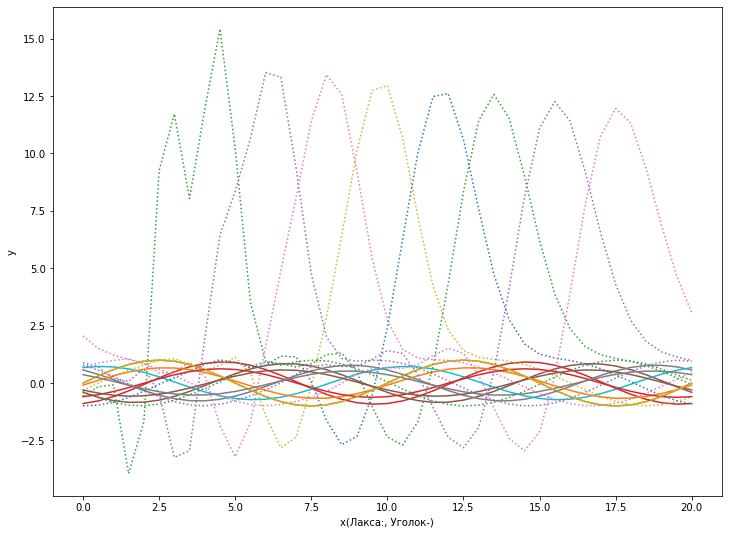

In [12]:
##УГОЛОК
for n in range (N_t):
    u.append([])
    u[n+1].append(0)
    for i in range(int(L/h)):
        u[n+1].append(u[n][i+1] - CFL*(u[n][i+1] - u[n][i]))
    u[n+1][0] = u[n+1][(len(u_0)-1)]
    counter_t2 += t
    if (counter_t2 >= time_next_output2) :
        results2.append(u[n+1])
        ##print((counter_t2), u[n+1])
        k_u+=1
        time_next_output2 += dt_out_results2
        ##print(len(results2[k_u-1]))
print(k_y)
fig, ax = plt.subplots(figsize=(12, 9))
ax.set_xlabel('x(Лакса'':'', Уголок''-'')')
ax.set_ylabel('y')
for i in range(k_y):
    ax.plot(x, results1[i], linestyle=':')
    ax.plot(x, results2[i], linestyle='-')
ax.plot(x, y_0, linestyle='dashed')
plt.show()
